## Imports

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Load DF

Subset a day's worth of tweets

In [31]:
df = pd.read_csv('tweet_load.csv')
df = df.head(1440)
df['time'] = df['time'].str[-5:]  # Extract the last two numbers

In [32]:
df

,time,tweets
0,00-00,2964.0
1,00-01,2593.0
2,00-02,2653.0
3,00-03,2650.0
4,00-04,2638.0
...,...,...
1435,23-55,2541.0
1436,23-56,2358.0
1437,23-57,2326.0
1438,23-58,2331.0


## Visualize Day 1's Tweets

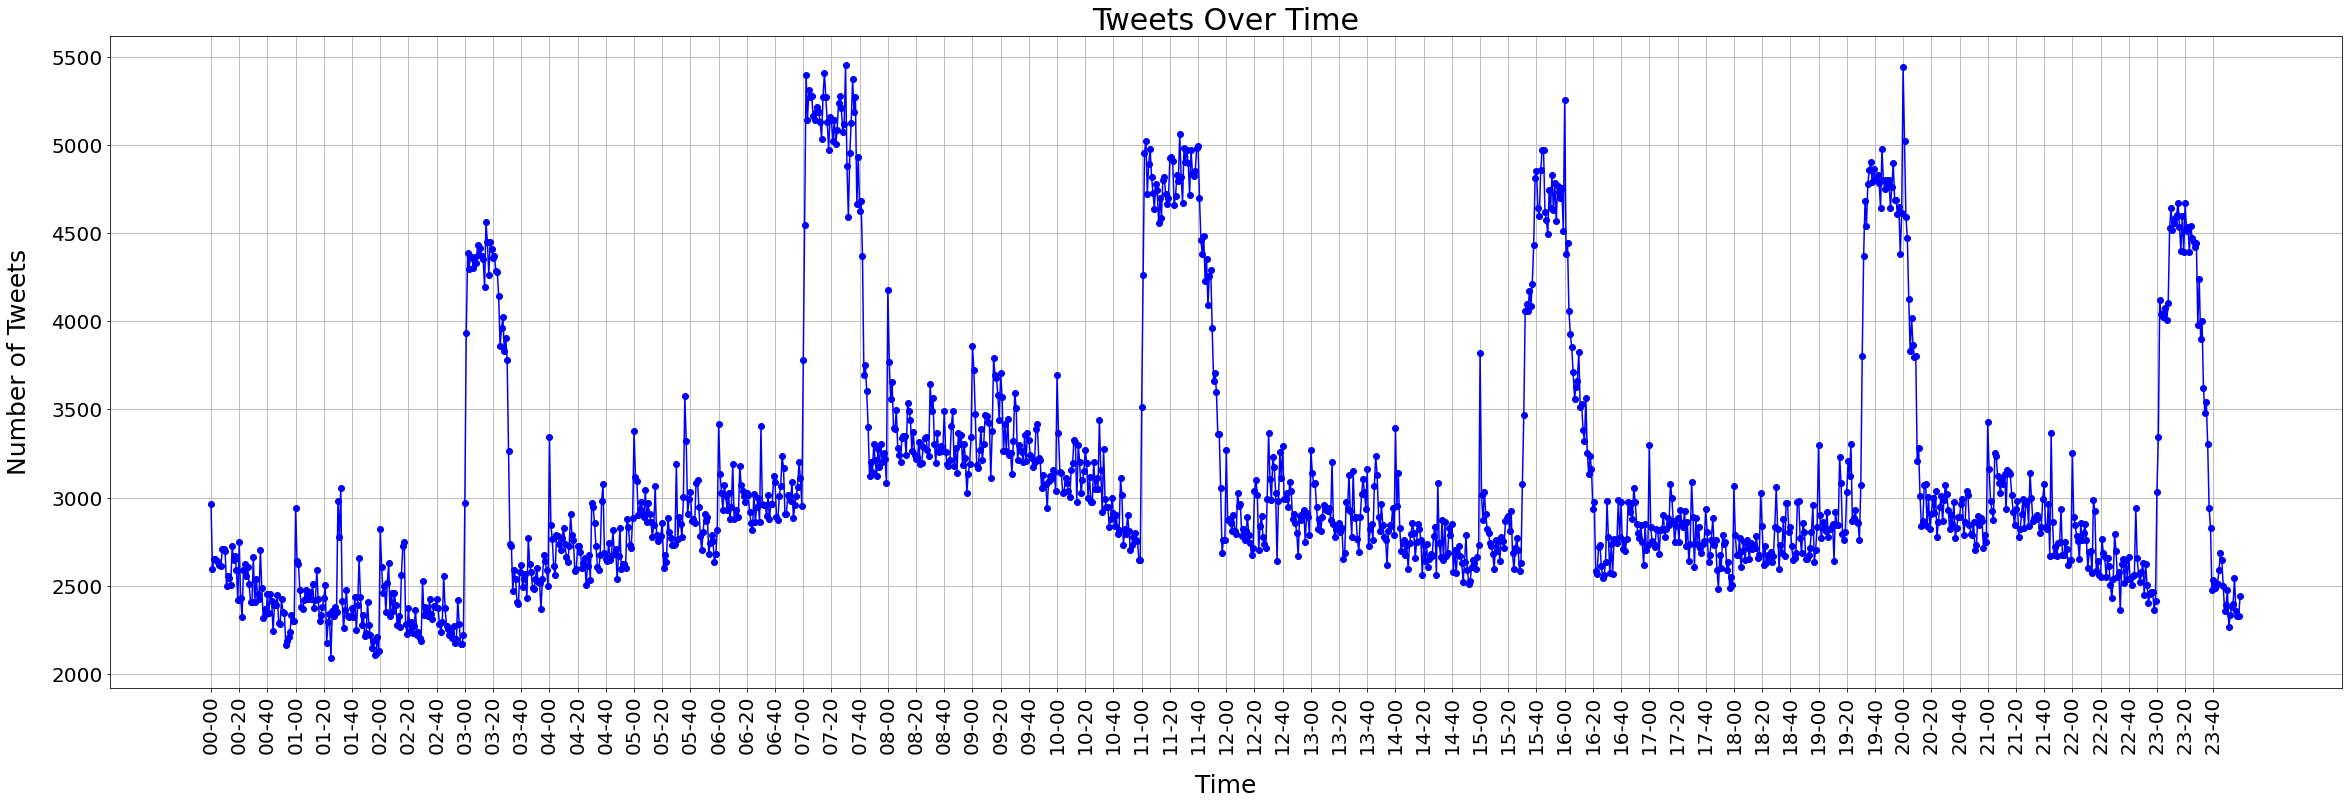

In [38]:
# Extract the 'time' and 'tweets' columns from your DataFrame
time = df['time']
tweets = df['tweets']

# Create a line plot
plt.figure(figsize=(40, 12))  # Adjust the figure size if needed
plt.plot(time, tweets, marker='o', linestyle='-', color='b')
plt.title('Tweets Over Time', fontsize=30)
plt.xlabel('Time', fontsize=25, labelpad=20)
plt.ylabel('Number of Tweets', fontsize=25, labelpad=20)
plt.grid(True)

plt.xticks(rotation='vertical')
plt.gca().set_xticks(time[::20])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show the plot
plt.show()

## Subset the 20-minute window with the highest variance

In [25]:
# Assuming 'time' is in the 'dd-hh-mm-ss' format, convert it to datetime
df['time'] = pd.to_datetime(df['time'], format='%H-%M')

# Sort the DataFrame by 'time' in ascending order
df = df.sort_values(by='time')

# Calculate the variance for each 20-minute window
window_size = pd.Timedelta(minutes=20)
variances = []

for i in range(len(df) - 1):
    window_start = df.iloc[i]['time']
    window_end = window_start + window_size

    window_data = df[(df['time'] >= window_start) & (df['time'] < window_end)]
    variance = window_data['tweets'].var()
    variances.append((window_start, window_end, variance))

# Find the 20-minute window with the highest variance
max_variance_window = max(variances, key=lambda x: x[2])

print(f"Highest Variance Window: {max_variance_window[0]} - {max_variance_window[1]}")
print(f"Variance: {max_variance_window[2]}")

Highest Variance Window: 1900-01-01 06:51:00 - 1900-01-01 07:11:00
Variance: 1176660.0921052631


In [26]:
# Assuming 'time' is in datetime format
df['time'] = pd.to_datetime(df['time'], format='%H-%M')

# Define the start and end times
start_time = pd.to_datetime('06-51', format='%H-%M')
end_time = pd.to_datetime('07-11', format='%H-%M')

# Use boolean indexing to subset the DataFrame
subset_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
subset_df['time'] = subset_df['time'].dt.strftime('%H:%M')

df = subset_df

df

/tmp/ipykernel_9819/2781426664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['time'] = subset_df['time'].dt.strftime('%H:%M')


,time,tweets
411,06:51,2979.0
412,06:52,3087.0
413,06:53,2883.0
414,06:54,2958.0
415,06:55,3006.0
416,06:56,3060.0
417,06:57,3199.0
418,06:58,3110.0
419,06:59,2951.0
420,07:00,3779.0


## Visualize this Window

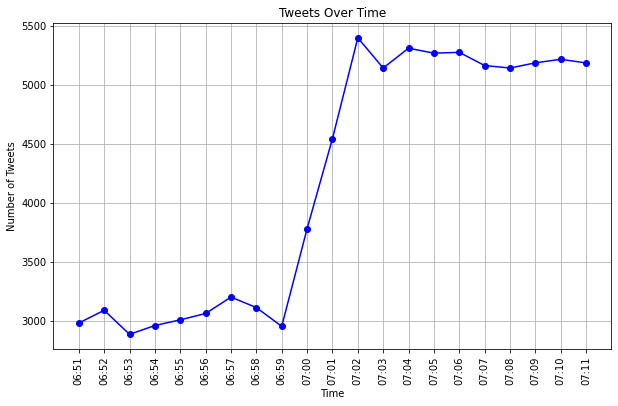

In [27]:
time = df['time']
tweets = df['tweets']

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(time, tweets, marker='o', linestyle='-', color='b')
plt.title('Tweets Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.grid(True)

plt.xticks(rotation='vertical')
plt.gca().set_xticks(time[::1])

# Show the plot
plt.show()